<a href="https://colab.research.google.com/github/Darshanbhai/News-sentiment-analysis/blob/main/News_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install newsapi-python

In [3]:
!pip install yfinance


In [4]:
import nltk
### Uncomment it when the script runs for the first time
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
from newsapi import NewsApiClient
#from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta, datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [6]:
# Show full output in Colab
# https://stackoverflow.com/questions/54692405/output-truncation-in-google-colab
pd.set_option('display.max_colwidth',1000)

In [7]:
# Init news api
NEWS_API_KEY = '2adc9646b17746ffbd42e9526c1443e1'

# '1900869fa01647fca0bdc19b4550daa0'

In [8]:
#https://newsapi.org/docs/endpoints/everything

newsapi = NewsApiClient(api_key= NEWS_API_KEY)
keywrd = 'Tesla stock'
my_date = date.today() - timedelta(days=1)
# datetime.strptime('10-Apr-2021','%d-%b-%Y')

articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(),
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      #sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)

In [9]:
articles


{'status': 'ok',
 'totalResults': 163,
 'articles': [{'source': {'id': None, 'name': "Investor's Business Daily"},
   'author': None,
   'title': "Tesla Breaks Out From Buy Point Ahead Of 'One Of The Most Important Events' For EV Giant",
   'description': "Tesla stock advanced above a traditional buy point during Monday's stock market.",
   'url': 'https://www.investors.com/news/tesla-stock-breaks-out-ahead-of-one-of-the-most-important-events-for-ev-giant/',
   'urlToImage': 'https://www.investors.com/wp-content/uploads/2019/03/stock-Tesla-sign-02-shutter.jpg',
   'publishedAt': '2025-11-03T15:12:54Z',
   'content': 'Information in Investors Business Daily is for informational and educational purposes only and should not be construed as an offer, recommendation, solicitation, or rating to buy or sell securities. … [+1064 chars]'},
  {'source': {'id': None, 'name': 'Biztoc.com'},
   'author': 'apnews.com',
   'title': "Nation's largest fleet of police Cybertrucks to patrol Las Vegas",
 

In [10]:
PHRASES = ['Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.',\
           'Wow, how things change.',\
           'Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.',\
           'Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.']

for phrase in PHRASES:
  print(f'{phrase}')
  print(sia.polarity_scores(phrase))

Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.
{'neg': 0.084, 'neu': 0.603, 'pos': 0.313, 'compound': 0.7624}
Wow, how things change.
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.5719}
Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}


In [11]:

def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):

  newsapi = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(),
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(),
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()

  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])


In [12]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en

# return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = '9-Apr-2021',sources_list = None, show_all_articles= True)
# return_articles.Sentiment.hist(bins=30,grid=False)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)



    Sentiment  \
0      0.4754   
1      0.0000   
2      0.6908   
3      0.3400   
4     -0.3818   
..        ...   
90     0.2023   
91     0.0000   
92    -0.4588   
93     0.0000   
94    -0.3597   

                                                                                                                                                         URL  \
0                                              https://www.investors.com/news/tesla-stock-breaks-out-ahead-of-one-of-the-most-important-events-for-ev-giant/   
1                                                                                                                      https://biztoc.com/x/be019d26772c0a62   
2                                              https://www.forbes.com/sites/greatspeculations/2025/11/03/can-oklos-20-billion-story-survive-without-revenue/   
3   https://finance.yahoo.com/news/live/stock-market-today-dow-sp-500-nasdaq-futures-rise-as-november-kicks-off-with-earnings-ai-fed-in-focus-000604519.htm

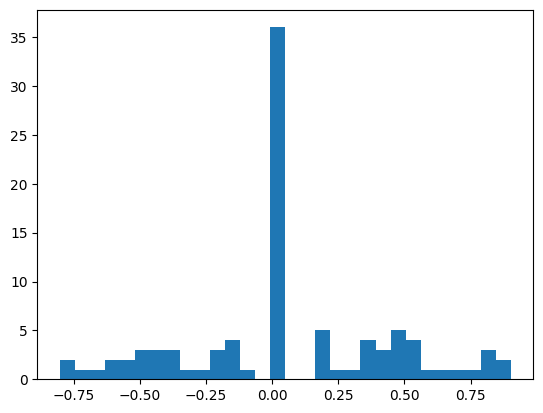

In [13]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en

my_date = date.today() - timedelta(days=1)

return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)


In [14]:
return_articles["Date"] = my_date


In [15]:
return_articles.head()

,Sentiment,URL,Title,Description,Date
0,0.4754,https://www.investors.com/news/tesla-stock-breaks-out-ahead-of-one-of-the-most-important-events-for-ev-giant/,Tesla Breaks Out From Buy Point Ahead Of 'One Of The Most Important Events' For EV Giant,Tesla stock advanced above a traditional buy point during Monday's stock market.,2025-11-03
1,0.0000,https://biztoc.com/x/be019d26772c0a62,Nation's largest fleet of police Cybertrucks to patrol Las Vegas,,2025-11-03
2,0.6908,https://www.forbes.com/sites/greatspeculations/2025/11/03/can-oklos-20-billion-story-survive-without-revenue/,Can Oklo’s $20 Billion Story Survive Without Revenue?,Oklo Inc. currently holds a valuation on paper greater than that of certain well-established energy firms — despite the fact that it has not yet generated any revenue.,2025-11-03
3,0.3400,https://finance.yahoo.com/news/live/stock-market-today-dow-sp-500-nasdaq-futures-rise-as-november-kicks-off-with-earnings-ai-fed-in-focus-000604519.html,"Stock market today: Dow, S&P 500, Nasdaq futures rise as November kicks off with earnings, AI, Fed in focus","US stock futures made gains, with Wall Street looking to maintain upward momentum.",2025-11-03
4,-0.3818,https://finance.yahoo.com/news/tariffs-tacos-dollars-global-markets-094831525.html,"Tariffs, TACOs, and dollars: global markets in a year of Trump 2.0","(Reuters) -In the year since Donald Trump's election as U. president, global financial markets have had to navigate policy shocks and unprecedented...",2025-11-03


In [16]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL', 'Description','Title']].head(2)


,Sentiment,URL,Description,Title
11,-0.8020,https://finance.yahoo.com/news/ai-blame-high-electricity-bills-020107657.html,The cost of keeping the lights on is becoming a painful financial burden for many Americans as electricity costs are rising faster than inflation. While...,Is AI to Blame For My High Electricity Bills? Electricity Costs Soar More Than 200% Near Data Centers
35,-0.7506,https://biztoc.com/x/8bfb64c5ba9e905a,,Tesla Sued Over Claim Faulty Doors Led to Deaths in Fiery Crash


In [17]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(2)


,Sentiment,URL,Description,Title
36,0.9022,https://biztoc.com/x/a516e0554b02a5f2,"Markets signaled another positive session as futures rose Sunday night ahead of a big week for President Donald Trump’s tariffs and Tesla CEO Elon Musk’s blockbuster compensation plan.\nFutures tied to the Dow Jones industrial average rose 107 points, or 0.22%…",Stock futures climb as investors await Supreme Court showdown on Trump tariffs and shareholder vote on Musk's $1 trillion pay package
13,0.8979,https://biztoc.com/x/1822646b6b3444ce,Key Points\n-\nTesla's expenses are rising and earnings are falling at the same time that EV tax credits have expired.\n-\nFerrari continues to enjoy an operating margin of around 29% and demand for its supercars remains sky high.\n-\nFerrari looks like the better …,Tesla vs. Ferrari: Which Is the Better Stock?


In [18]:
return_articles.to_csv("TSLA_news_sentiments_"+my_date.isoformat()+".csv")
